In [20]:
import numpy as np
import scipy.io as sio
from scipy.integrate import solve_ivp
import scipy as sp
import matplotlib.pyplot as mpl
import pymc as pm
import arviz as az
import pandas as pd
import os
from datetime import datetime
import sys
from math import atan,cos,sin
from vd_class import vd_8dof
from point import Point

### Set up vehicle for the test data

/home/huzaifa/research/tutorials/vd_class.py:1096: UserWarning: Set parameters to default values
{'a': 1.14, 'b': 1.4, 'Cf': 44000, 'Cr': 47000, 'Cxf': 5000, 'Cxr': 5000, 'm': 1400, 'Jz': 2420, 'r0': 0.285, 'Jw': 2, 'Jx': 900, 'Jy': 2000, 'Jxz': 90, 'h': 0.75, 'cf': 1.5, 'cr': 1.5, 'muf': 80, 'mur': 80, 'ktf': 200000, 'ktr': 200000, 'hrcf': 0.65, 'hrcr': 0.6, 'krof': 29000, 'kror': 29000, 'brof': 3000, 'bror': 3000, 'rr': 0.0125}
  warnings.warn("Set parameters to default values" +


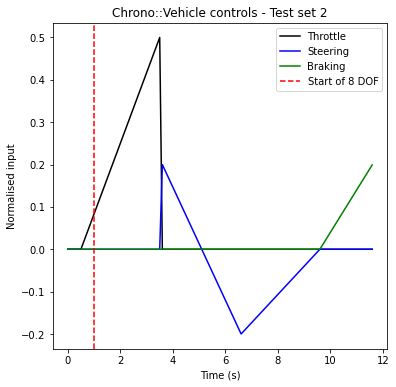

In [21]:
test = 2

if(test == 2):    
    ## Test 2

    ## Data
    state = pd.read_csv("test_2.csv",sep=',',header='infer')

    n1 = 100
    n2 = 1160

    st_time = 1.
    end_time = 11.6

    t_eval  = np.arange(st_time,end_time,0.01)
    time = np.arange(st_time,end_time,0.01)


    def zero_throt(t):
        return 0 * t

    def zero_st(t):
        return 0 *t

    def zero_brake(t):
        return 0 * t


    # Set all the throttle controls
    throt1 = Point(0.5,0)
    throt2 = Point(3.5,0.5)
    ramp_throt1 = throt1.get_eq(throt2)
    throt3 = Point(3.5,0.5)
    throt4 = Point(3.6,0)
    ramp_throt2 = throt3.get_eq(throt4)

    def ramp_throt(t):
        if(t<0.5):
            return 0
        elif(t<3.5):
            return ramp_throt1(t)
        elif(t <= 3.6):
            return ramp_throt2(t)
        else:
            return zero_throt(t)


    # Set the steering
    st1 = Point(3.5,0)
    st2 = Point(3.6,0.2)
    ramp_st1 = st1.get_eq(st2)
    st3 = Point(3.6,0.2)
    st4 = Point(6.6,-0.2)
    ramp_st2 = st3.get_eq(st4)
    st5 = Point(6.6,-0.2)
    st6 = Point(9.6,0)
    ramp_st3 = st5.get_eq(st6)

    def ramp_st(t):
        if(t<3.5):
            return zero_st(t)
        elif(t <=3.6):
            return ramp_st1(t)
        elif(t<=6.6):
            return ramp_st2(t)
        elif(t<=9.6):
            return ramp_st3(t)
        else:
            return zero_st(t)


    #Braking
    br1 = Point(9.6,0)
    br2 = Point(11.6,0.2)
    ramp_br1 = br1.get_eq(br2)

    def brake_tor(t):
        if(t<9.6):
            return zero_brake(t)
        else:
            return ramp_br1(t)


    # Initialise the vehicle and set the initial state
    st = {'x' : state['x'][n1]-state['x'][n1],'y':state['y'][n1]-state['y'][n1],'u':state['vx'][n1],'v':state['vy'][n1],'psi':state['yaw'][n1],
    'phi':state['roll'][n1],'wx':state['roll_rate'][n1],'wz':state['yaw_rate'][n1],
          'wlf' : state['wlf'][n1],'wlr' : state['wlr'][n1],'wrf' : state['wrf'][n1],'wrr' : state['wrr'][n1]}
    vehicle = vd_8dof(states = st)

    # Set all the controls
    vehicle.set_steering(ramp_st)
    vehicle.set_throttle(ramp_throt)
    vehicle.set_braking(brake_tor)

    vehicle.debug = 0

    ts = np.arange(0,11.6,0.01)
    th = []
    s = []
    bra = []
    for t in ts:
        th.append(ramp_throt(t))
        s.append(ramp_st(t))
        bra.append(brake_tor(t))

    mpl.figure(figsize = (6,6))
    mpl.plot(ts,th,'k',ts,s,'b',ts,bra,'g')
    mpl.axvline(x=1,color='r',ls='--',label='Start of 8 DOF')
    mpl.legend(['Throttle','Steering','Braking','Start of 8 DOF'])
    mpl.xlabel('Time (s)')
    mpl.ylabel('Normalised input')
    mpl.title('Chrono::Vehicle controls - Test set 2')
    mpl.savefig('./images/test_input_2.png',facecolor = 'w')
    mpl.show()

else:
    ## Test 1

    ## Data
    state = pd.read_csv("test_2.csv",sep=',',header='infer')

    n1 = 100
    n2 = 1250

    st_time = 1.
    end_time = 12.5

    t_eval  = np.arange(st_time,end_time,0.01)
    time = np.arange(st_time,end_time,0.01)


    def zero_throt(t):
        return 0 * t

    def zero_st(t):
        return 0 *t

    def zero_brake(t):
        return 0 * t


    # Set all the throttle controls
    throt1 = Point(0.5,0)
    throt2 = Point(4.5,0.5)
    ramp_throt1 = throt1.get_eq(throt2)
    throt3 = Point(4.5,0.5)
    throt4 = Point(8.5,0)
    ramp_throt2 = throt3.get_eq(throt4)

    def ramp_throt(t):
        if(t<0.5):
            return 0
        elif(t<4.5):
            return ramp_throt1(t)
        elif(t <= 8.5):
            return ramp_throt2(t)
        else:
            return zero_throt(t)

    # Set the steering
    st1 = Point(4.5,0)
    st2 = Point(8.5,0.2)
    ramp_st1 = st1.get_eq(st2)
    st3 = Point(8.5,0.2)
    st4 = Point(12.5,0)
    ramp_st2 = st3.get_eq(st4)
    
    def ramp_st(t):
        if(t<4.5):
            return zero_st(t)
        elif(t <=8.5):
            return ramp_st1(t)
        elif(t<=12.5):
            return ramp_st2(t)


    #Braking
    br1 = Point(9.6,0)
    br2 = Point(11.6,0.2)
    ramp_br1 = br1.get_eq(br2)

    def brake_tor(t):
        return zero_brake(t)


    # Initialise the vehicle and set the initial state
    st = {'x' : state['x'][n1]-state['x'][n1],'y':state['y'][n1]-state['y'][n1],'u':state['vx'][n1],'v':state['vy'][n1],'psi':state['yaw'][n1],
    'phi':state['roll'][n1],'wx':state['roll_rate'][n1],'wz':state['yaw_rate'][n1],
          'wlf' : state['wlf'][n1],'wlr' : state['wlr'][n1],'wrf' : state['wrf'][n1],'wrr' : state['wrr'][n1]}
    vehicle = vd_8dof(states = st)

    # Set all the controls
    vehicle.set_steering(ramp_st)
    vehicle.set_throttle(ramp_throt)
    vehicle.set_braking(brake_tor)

    vehicle.debug = 0

    ts = np.arange(0,12.5,0.01)
    th = []
    s = []
    bra = []
    for t in ts:
        th.append(ramp_throt(t))
        s.append(ramp_st(t))
        bra.append(brake_tor(t))

    mpl.figure(figsize = (6,6))
    mpl.plot(ts,th,'k',ts,s,'b',ts,bra,'g')
    mpl.axvline(x=1,color='r',ls='--',label='Start of 8 DOF')
    mpl.legend(['Throttle','Steering','Braking','Start of 8 DOF'])
    mpl.xlabel('Time (s)')
    mpl.ylabel('Normalised input')
    mpl.title('Chrono::Vehicle controls - Test set 1')
    mpl.savefig('./images/test_input_1.png',facecolor = 'w')
    mpl.show()

    



### Get the noisy data and the chain files

In [22]:
# The chain file - for lateral parameters
# filename = "20220527_003715"
filename = "20220611_230716"
idata_lat = az.from_netcdf('./results/' + filename + ".nc")

# The chain file - for longitudinal parameters
# filename = "20220526_164347"
filename = "20220612_024952"
idata_lon = az.from_netcdf('./results/' + filename + ".nc")

# The chain file for rolling resistance
filename = "20220612_025748"
idata_rr = az.from_netcdf('./results/' + filename + ".nc")

if(test == 2):
    dataFileName = 'vd_chrono_test_2.npy'
    ##The data in npy format
    with open(dataFileName, 'rb') as f:
        data = np.load(f)
else:
    dataFileName = 'vd_chrono_test_1.npy'
    ##The data in npy format
    with open(dataFileName, 'rb') as f:
        data = np.load(f)

    
# Number of data vectors
data_vecs = 12

### Extract the posteriors from the idata file

In [4]:
#First the lateral parameters
shape_lat = idata_lat['posterior']['Cf'].shape

posterior_Cf = np.asarray(idata_lat['posterior']['Cf']).reshape(shape_lat[0]*shape_lat[1],)
posterior_Cr = np.asarray(idata_lat['posterior']['Cr']).reshape(shape_lat[0]*shape_lat[1],)
posterior_krof = np.asarray(idata_lat['posterior']['krof']).reshape(shape_lat[0]*shape_lat[1],)
posterior_kror =np.asarray(idata_lat['posterior']['kror']).reshape(shape_lat[0]*shape_lat[1],)
posterior_brof = np.asarray(idata_lat['posterior']['brof']).reshape(shape_lat[0]*shape_lat[1],)
posterior_bror =np.asarray(idata_lat['posterior']['bror']).reshape(shape_lat[0]*shape_lat[1],)

#Next the longitudinal parameters
shape_lon = idata_lon['posterior']['Cxf'].shape

posterior_Cxf = np.asarray(idata_lon['posterior']['Cxf']).reshape(shape_lon[0]*shape_lon[1],)
posterior_Cxr = np.asarray(idata_lon['posterior']['Cxr']).reshape(shape_lon[0]*shape_lon[1],)

# Finally the rr
shape_rr = idata_rr['posterior']['rr'].shape

posterior_rr = np.asarray(idata_rr['posterior']['rr']).reshape(shape_rr[0]*shape_rr[1],)




### Place the priors

In [5]:
#Lateral
shape = idata_lat['posterior']['Cf'].shape

prior_Cf = np.random.uniform(low=20000,high=80000,size=(shape[0]*shape[1]),)
prior_Cr = np.random.uniform(low=20000,high=80000,size=(shape[0]*shape[1]),)
prior_krof = np.random.uniform(low=1000,high=50000,size=(shape[0]*shape[1]),)
prior_kror = np.random.uniform(low=1000,high=50000,size=(shape[0]*shape[1]),)
# prior_brof = np.random.uniform(low=100,high=30000,size=(shape[0]*shape[1]),)
# prior_bror = np.random.uniform(low=100,high=30000,size=(shape[0]*shape[1]),)
prior_bro =  np.random.uniform(low=200,high=60000,size=(shape[0]*shape[1]),)
prior_brof = prior_bro/2
prior_bror = prior_bro/2

#Longitudinal
prior_Cxf = np.random.uniform(low=1000,high=50000,size=(shape[0]*shape[1]),)
prior_Cxr = np.random.uniform(low=1000,high=50000,size=(shape[0]*shape[1]),)

# Rolling resistance
prior_rr = np.random.uniform(low=0.005,high=0.03,size=(shape[0]*shape[1]),)

### Sample from the posterior

In [6]:
#Number of posterior lines
no_post = 100

#Random points to sample
random_points = np.random.randint(low=0,high=shape[0]*shape[1],size=(no_post,),dtype=int)

#The posterior data lines - Longitudinal Velocity, LF angular velocity and RF angular velocity
posterior = np.empty((no_post,time.shape[0],data_vecs))

for i in range(0,no_post):
    vehicle.update_params(Cf=posterior_Cf[random_points[i]],Cr = posterior_Cr[random_points[i]],
                          krof = posterior_krof[random_points[i]],kror = posterior_kror[random_points[i]],
                          brof = posterior_brof[random_points[i]],bror = posterior_bror[random_points[i]],
                          Cxf =posterior_Cxf[random_points[i]],Cxr =posterior_Cxr[random_points[i]],
                          rr=posterior_rr[random_points[i]],m=2097.85,muf=127.866,mur=129.98,a= 1.6889,
                          b =1.6889,h = 0.713,cf = 1.82,cr = 1.82,Jx = 1289,Jz = 4519,Jxz = 3.265,r0=0.47,
                          ktf=326332,ktr=326332,hrcf=0.379,hrcr=0.327,Jw=11)
    mod = vehicle.solve_half_impl(t_span = [t_eval[0],t_eval[-1]],t_eval = t_eval,tbar = 5e-3)
    mod = np.transpose(mod)
    vehicle.reset_state(init_state=st)
    

    for d in range(0,data_vecs):
        posterior[i,:,d] = mod[d,:]


In [7]:
# posterior[:,:,0]

### Sample from the prior

In [8]:
#Number of prior lines
no_post = 100

#Random points to sample
random_points = np.random.randint(low=0,high=shape[0]*shape[1],size=(no_post,),dtype=int)

#The prior data lines - Longitudinal Velocity, LF angular velocity and RF angular velocity
prior = np.empty((no_post,time.shape[0],data_vecs))

for i in range(0,no_post):
    vehicle.update_params(Cf=prior_Cf[random_points[i]],Cr = prior_Cr[random_points[i]],
                          krof = prior_krof[random_points[i]],kror = prior_kror[random_points[i]],
                          brof = prior_brof[random_points[i]],bror = prior_bror[random_points[i]],
                          Cxf =prior_Cxf[random_points[i]],Cxr =prior_Cxr[random_points[i]],
                          rr=prior_rr[random_points[i]],m=2097.85,muf=127.866,mur=129.98,a= 1.6889,
                          b =1.6889,h = 0.713,cf = 1.82,cr = 1.82,Jx = 1289,Jz = 4519,Jxz = 3.265,r0=0.47,
                          ktf=326332,ktr=326332,hrcf=0.379,hrcr=0.327,Jw=11)
    mod = vehicle.solve_half_impl(t_span = [t_eval[0],t_eval[-1]],t_eval = t_eval,tbar = 5e-3)
    mod = np.transpose(mod)
    vehicle.reset_state(init_state=st)
    

    for d in range(0,data_vecs):
        prior[i,:,d] = mod[d,:]


### Expectations

In [9]:
post_exp = posterior.mean(axis=0)
prior_exp = prior.mean(axis=0)

In [10]:
post_exp.shape

(1060, 12)

### Mean posterior

In [11]:
## Lateral
means_lat = idata_lat.mean()
post_Cf = float(means_lat['posterior']['Cf'])
post_Cr = float(means_lat['posterior']['Cr'])
post_krof = float(means_lat['posterior']['krof'])
post_kror = float(means_lat['posterior']['kror'])
post_brof = float(means_lat['posterior']['brof'])
post_bror = float(means_lat['posterior']['bror'])

#Longitudinal
means_lon = idata_lon.mean()
post_Cxf = float(means_lon['posterior']['Cxf'])
post_Cxr = float(means_lon['posterior']['Cxr'])

#Rolling resistance
means_rr = idata_rr.mean()
post_rr = float(means_rr['posterior']['rr'])



vehicle.update_params(Cf=post_Cf ,Cr = post_Cr ,
                      krof = post_krof ,kror = post_kror ,
                      brof = post_brof ,bror = post_bror ,
                      Cxf =post_Cxf ,Cxr =post_Cxr ,
                      rr=post_rr ,m=2097.85,muf=127.866,mur=129.98,a= 1.6889,
                      b =1.6889,h = 0.713,cf = 1.82,cr = 1.82,Jx = 1289,Jz = 4519,Jxz = 3.265,r0=0.47,
                      ktf=326332,ktr=326332,hrcf=0.379,hrcr=0.327,Jw=11)
mod = vehicle.solve_half_impl(t_span = [t_eval[0],t_eval[-1]],t_eval = t_eval,tbar = 5e-3)
mod = np.transpose(mod)
vehicle.reset_state(init_state=st)

post_mean = mod.T
    



In [12]:
post_mean.shape

(1060, 12)

### Mean prior

In [13]:
## Lateral
prior_Cf = prior_Cf.mean()
prior_Cr = prior_Cr.mean()
prior_krof =prior_krof.mean()
prior_kror = prior_kror.mean()
prior_brof = prior_brof.mean()
prior_bror = prior_bror.mean()

#Longitudinal
prior_Cxf = prior_Cxf.mean()
prior_Cxr = prior_Cxr.mean()

#Rolling resistance
prior_rr = prior_rr.mean()




vehicle.update_params(Cf=prior_Cf ,Cr = prior_Cr ,
                      krof = prior_krof ,kror = prior_kror ,
                      brof = prior_brof ,bror = prior_bror ,
                      Cxf =prior_Cxf ,Cxr =prior_Cxr ,
                      rr=prior_rr ,m=2097.85,muf=127.866,mur=129.98,a= 1.6889,
                      b =1.6889,h = 0.713,cf = 1.82,cr = 1.82,Jx = 1289,Jz = 4519,Jxz = 3.265,r0=0.47,
                      ktf=326332,ktr=326332,hrcf=0.379,hrcr=0.327,Jw=11)
mod = vehicle.solve_half_impl(t_span = [t_eval[0],t_eval[-1]],t_eval = t_eval,tbar = 5e-3)
mod = np.transpose(mod)
vehicle.reset_state(init_state=st)

prior_mean = mod.T
    

## Posteriors

### Posterior plot function

In [14]:
def plot_posts(posterior,data,titles,labels,saves,test_suffix='1'):
    data_vecs = posterior.shape[2]
    for d in range(0,data_vecs):
        #Trajectory plot
        if((d == 0) or (d == 1)):
            mpl.figure(figsize = (10,10))
            mpl.plot(data[0,:],data[1,:],'r',label ='noisy data',alpha=0.75)
            for i in range(0,no_post):
                mpl.plot(posterior[i,:,0],posterior[i,:,1],'b',alpha=0.2)

            mpl.plot(post_exp[:,0],post_exp[:,1],'k',linewidth = 2,label='posterior expectation')
            mpl.title("Vehicle Trajectory - Posterior",fontsize = 20)
            mpl.xlabel('X (m)',fontsize = 12)
            mpl.ylabel('Y (m)',fontsize = 12)
            mpl.plot(post_mean[:,0],post_mean[:,1],'g',linewidth=2,label='posterior mean')
            mpl.legend()
            if(d == 1):
                if(saves[d-1]):
                    mpl.savefig('./images/traj_post_' + test_suffix + '.png',facecolor = 'w')            
        else:
            mpl.figure(figsize = (6,6))
            mpl.plot(time,data[d,:],'r',label ='noisy data',alpha=0.75)
            for i in range(0,no_post):
                mpl.plot(time,posterior[i,:,d],'b',alpha=0.2)

            mpl.plot(time,post_exp[:,d],'k',linewidth = 2,label='posterior expectation')
            mpl.title(titles[d-2] + " - Posterior",fontsize = 20)
            mpl.xlabel('Time (S)',fontsize = 12)
            mpl.ylabel(labels[d-2],fontsize = 12)
            mpl.plot(time,post_mean[:,d],'g',linewidth=2,label='posterior mean')
            mpl.legend()
            if(saves[d-1]):
                name = titles[d-2].replace(" ","_")
                mpl.savefig('./images/' + name + '_post_' + test_suffix + '.png',facecolor = 'w')


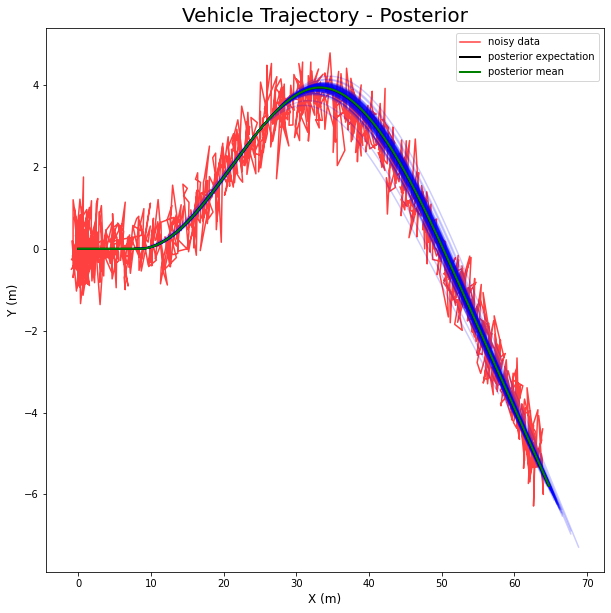

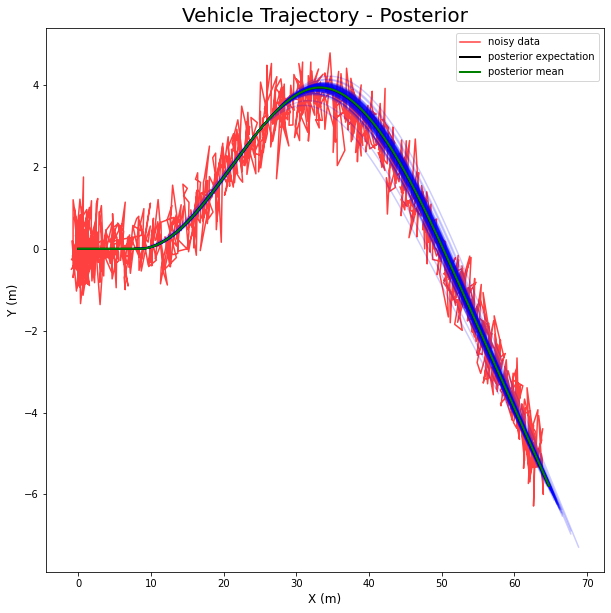

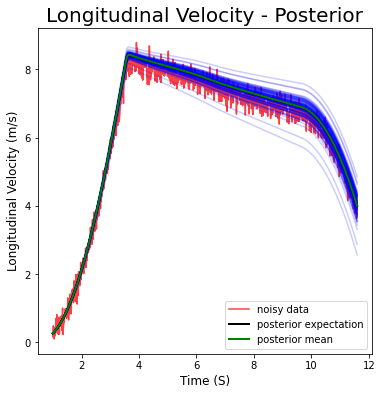

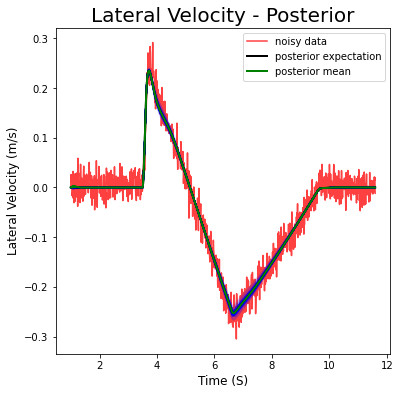

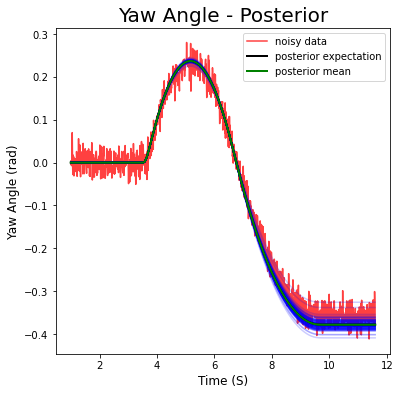

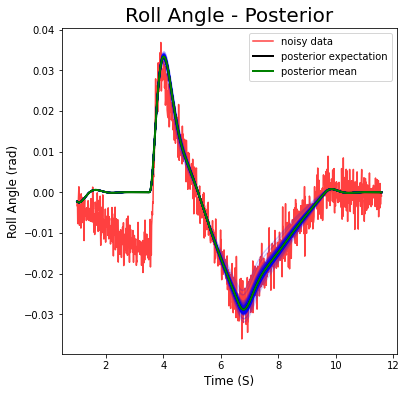

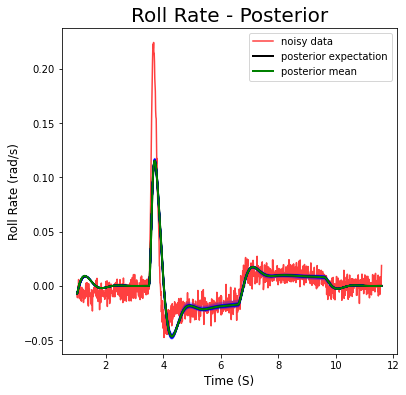

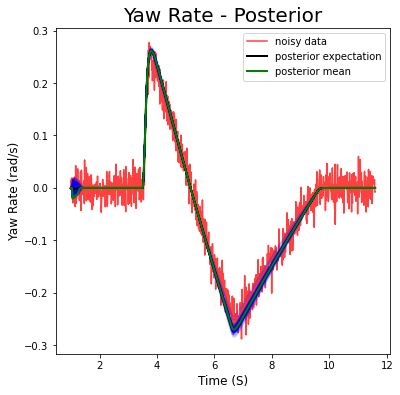

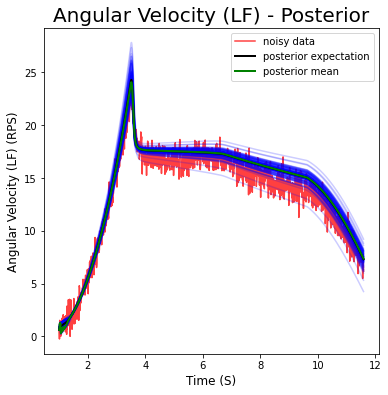

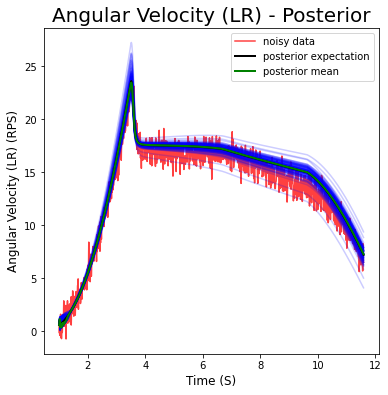

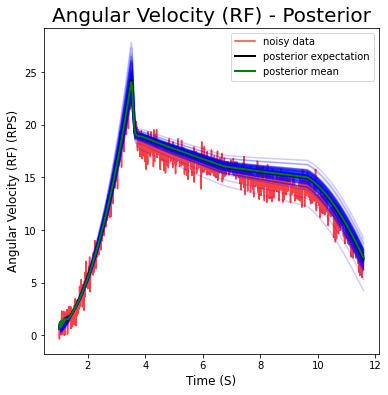

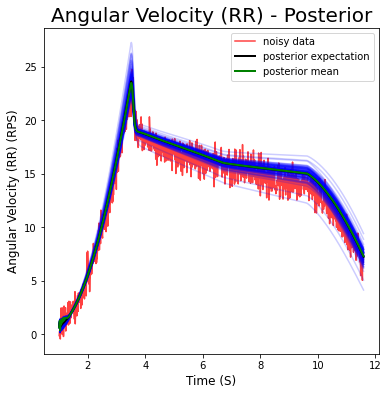

In [15]:
saves = [0,0,0,0,0,0,0,1,0,0,1]
labels = ['Longitudinal Velocity (m/s)',
         'Lateral Velocity (m/s)',
         'Yaw Angle (rad)',
         'Roll Angle (rad)',
         'Roll Rate (rad/s)',
         'Yaw Rate (rad/s)',
         'Angular Velocity (LF) (RPS)',
         'Angular Velocity (LR) (RPS)',
         'Angular Velocity (RF) (RPS)',
         'Angular Velocity (RR) (RPS)',]
titles = ['Longitudinal Velocity',
         'Lateral Velocity',
         'Yaw Angle',
         'Roll Angle',
         'Roll Rate',
         'Yaw Rate',
         'Angular Velocity (LF)',
         'Angular Velocity (LR)',
         'Angular Velocity (RF)',
         'Angular Velocity (RR)',]
test_suffix = 'test'
plot_posts(posterior,data,titles,labels,saves,test_suffix)

### Priors

In [158]:
def plot_priors(prior,data,titles,labels,saves,test_suffix='1'):
    data_vecs = prior.shape[2]
    for d in range(0,data_vecs):
        #Trajectory plot
        if((d == 0) or (d == 1)):
            mpl.figure(figsize = (6,6))
            mpl.plot(data[0,:],data[1,:],'r',label ='noisy data',alpha=0.75)
            for i in range(0,no_post):
                mpl.plot(prior[i,:,0],prior[i,:,1],'y',alpha=0.2)

            mpl.plot(prior_exp[:,0],prior_exp[:,1],'k',linewidth = 2,label='prior expectation')
            mpl.title("Vehicle Trajectory - Prior",fontsize = 20)
            mpl.xlabel('X (m)',fontsize = 12)
            mpl.ylabel('Y (m)',fontsize = 12)
            mpl.plot(prior_mean[:,0],prior_mean[:,1],'g',linewidth=2,label='prior mean')
            mpl.legend()
            if(d == 1):
                if(saves[d-1]):
                    mpl.savefig('./images/traj_prior_' + test_suffix + '.png',facecolor = 'w')            
        else:
            mpl.figure(figsize = (6,6))
            mpl.plot(time,data[d,:],'r',label ='noisy data',alpha=0.75)
            for i in range(0,no_post):
                mpl.plot(time,prior[i,:,d],'y',alpha=0.2)

            mpl.plot(time,prior_exp[:,d],'k',linewidth = 2,label='prior expectation')
            mpl.title(titles[d-2] + " - Prior",fontsize = 20)
            mpl.xlabel('Time (S)',fontsize = 12)
            mpl.ylabel(labels[d-2],fontsize = 12)
            mpl.plot(time,prior_mean[:,d],'g',linewidth=2,label='prior mean')
            mpl.legend()
            if(saves[d-1]):
                name = titles[d-2].replace(" ","_")
                mpl.savefig('./images/' + name + '_prior_' + test_suffix + '.png',facecolor = 'w')

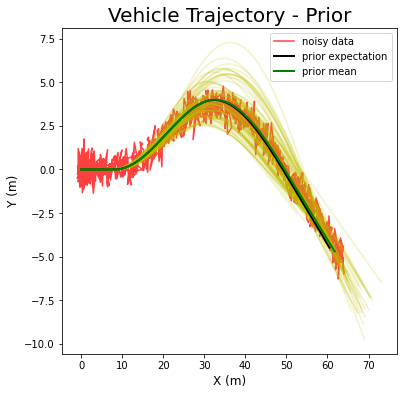

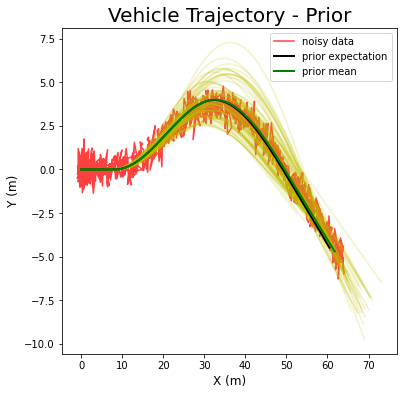

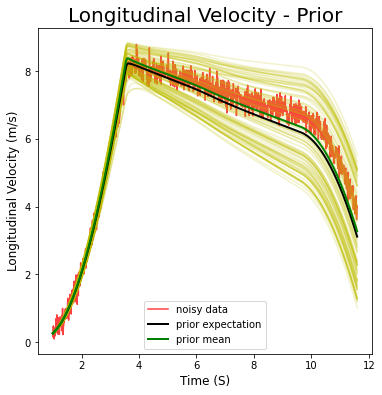

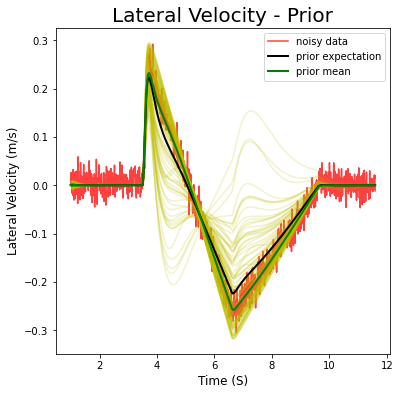

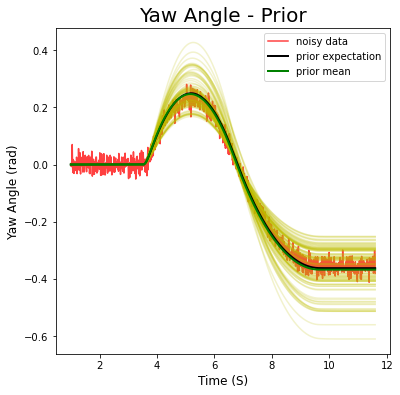

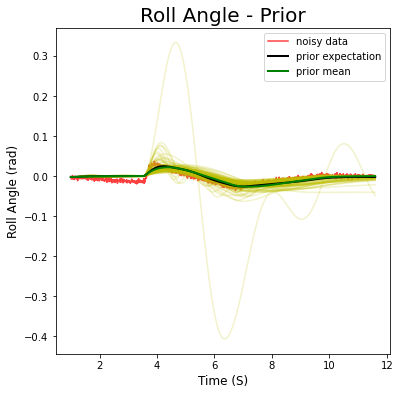

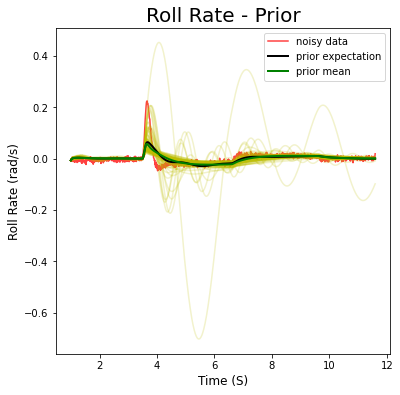

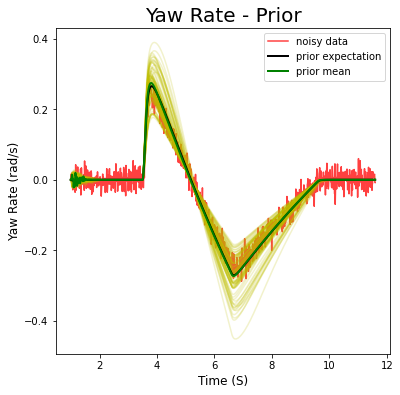

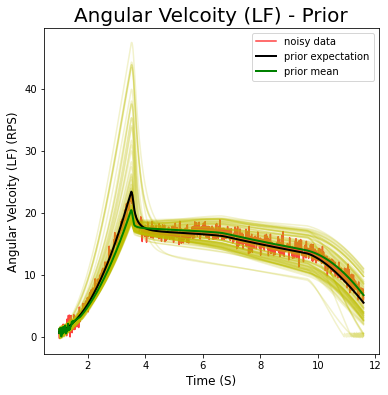

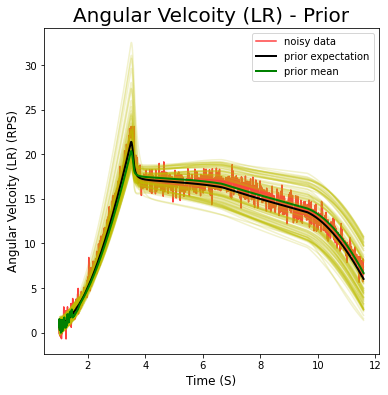

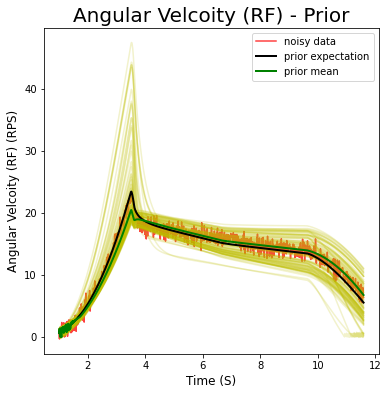

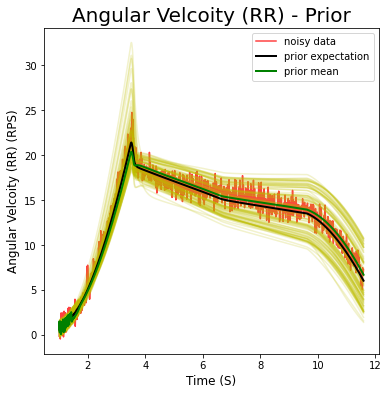

In [180]:
plot_priors(prior,data,titles,labels,saves,test_suffix)

### RMSE

In [160]:
def post_rmse(posterior,data):
    return np.mean(np.sqrt(np.sum(((posterior - data.T)**2),axis = 1)/data.shape[1]),axis=0)

In [161]:
print(post_rmse(posterior,data))

[1.11456029 0.61817677 0.31887826 0.02039707 0.02632794 0.00607124
 0.01647492 0.02197481 1.30079377 1.28363084 1.24909366 1.24503185]


In [162]:
def prior_rmse(prior,data):
    return np.mean(np.sqrt(np.sum(((prior - data.T)**2),axis = 1)/data.shape[1]),axis=0)

In [163]:
print(prior_rmse(prior,data))

[2.55246172 1.03526068 0.73564688 0.04607903 0.04807976 0.01300354
 0.02646851 0.03254377 2.14332957 1.93015242 2.10374675 1.91922048]


In [17]:
from numpy import arange, pi, sin

from bokeh.plotting import figure, show

x = arange(-2*pi, 2*pi, 0.1)
y = sin(x)

plot = figure(height=200)
plot.circle(x, y, alpha=0.6, size=7)

plot.yaxis.axis_label = r"\[\sin(x)\]"
plot.xaxis.axis_label = r"\[x\cdot\pi\]"

show(plot)